In [7]:
#MODE
folder = 'DIS'

In [2]:
#FUNCTIONS 

def calculate_true_positives(sig, threshold):
    tp=0
    for event in sig:
        # Ignore the first and last entries
        #event = event[1:-1]
        l=len(event)
        for i in range(l):
            if (decimal.Decimal(event[i])) >= threshold:
                #count true positive
                tp=tp+1
    return tp

def calculate_false_negatives(sig, threshold):
    fn=0
    for event in sig:
        # Ignore the first and last entries
        #event = event[1:-1]
        l=len(event)
        for i in range(l):
            if decimal.Decimal(event[i]) < threshold:
                #count true positive
                fn=fn+1
    return fn

def calculate_false_positives(bkg, threshold):
    fp=0
    for event in bkg:
        # Ignore the first and last entries
        #event = event[1:-1]
        l=len(event)
        for i in range(l):
            if decimal.Decimal(event[i]) >= threshold:
                #print(decimal.Decimal(event[i]))
                #count false positive
                fp=fp+1
    return fp

def calculate_true_negatives(bkg, threshold):
    tn=0
    for event in bkg:
        # Ignore the first and last entries
        #event = event[1:-1]
        l=len(event)
        for i in range(l):
            if decimal.Decimal(event[i]) < threshold:
                #count true positive
                tn=tn+1
    return tn

def calculate_total_positives(sig):
    ltp=0
    for event in sig:
        # Ignore the first and last entries
        #event = event[1:-1]
        l=len(event)
        ltp = ltp + l
    return ltp

def calculate_total_negatives(bkg):
    ltn=0
    for event in bkg:
        # Ignore the first and last entries
        #event = event[1:-1]
        l=len(event)
        ltn = ltn + l
    return ltn

def calculate_sig_eff(truepo, totalpo):
    return truepo / totalpo

def calculate_bkg_rej(trueneg, totalneg):
    return trueneg / totalneg

def calculate_significance(S, B):
    return S / np.sqrt(S+B)


def custom_round(number):
    if number < 0.005:
        return 0.0
    # Extract the first and second decimals
    first_decimal = int(number * 10) % 10
    second_decimal = int(number * 100) % 10

    # Check the second decimal and adjust the first decimal accordingly
    if second_decimal >= 5:
        first_decimal += 1

    # Round the number to one decimal place
    rounded_number = round(number, 1)

    # Adjust the first decimal based on the second decimal
    if first_decimal == 10:
        rounded_number = round(rounded_number + 0.1, 1)

    return rounded_number

def custom_round_second_dec(number):
    # Extract the first, second, and third decimals
    first_decimal = int(number * 10) % 10
    second_decimal = int(number * 100) % 10
    third_decimal = int(number * 1000) % 10

    # Check the third decimal and adjust the second decimal accordingly
    if third_decimal >= 5:
        second_decimal += 1

    # Check if the second decimal needs to be carried over to the first decimal
    if second_decimal == 10:
        first_decimal += 1
        second_decimal = 0

    # Round the number to two decimal places
    rounded_number = round(number, 2)

    # Adjust the first and second decimals based on the third decimal
    if first_decimal == 10:
        rounded_number = round(rounded_number + 0.01, 2)
    elif second_decimal == 10:
        rounded_number = round(rounded_number + 0.1, 1)

    return rounded_number

def calculate_tpr(true_positives, total_positives):
    return true_positives / total_positives

def calculate_fpr(false_positives, total_negatives):
    return false_positives / total_negatives

def calculate_precision(true_positives, false_positives):
    return true_positives / (true_positives + false_positives)

def calculate_recall(true_positives, total_positives):
    return true_positives / total_positives

def calculate_f1_score(precision, recall):
    # Avoid division by zero
    if precision + recall == 0:
        return 0

    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def calculate_purity(true_positives, false_positives):
    return true_positives / (true_positives + false_positives)

def calculate_significance(true_positives, false_positives):
    return true_positives / np.sqrt(true_positives + false_positives)

def calculate_confusion_matrix(sig, bkg, threshold):
    true_positives = calculate_true_positives(sig, threshold)
    false_positives = calculate_false_positives(bkg, threshold)
    true_negatives = calculate_true_negatives(sig, threshold)
    false_negatives = calculate_false_negatives(bkg, threshold)

    confusion_matrix = {
        'True Positives': true_positives,
        'False Positives': false_positives,
        'True Negatives': true_negatives,
        'False Negatives': false_negatives
    }

    return confusion_matrix

def plot_confusion_matrix(conf_matrix):
    labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
    values = [conf_matrix[label] for label in labels]

    cm_array = np.array(values).reshape(2, 2)
    sns.heatmap(cm_array, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Threshold: {threshold:.2f})')
    filename = f"{folder}/analysisfiles/images/confusionmatrix_{threshold:.2f}.png"
    plt.savefig(filename)
    plt.show()

In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import decimal
import time
from sklearn.metrics import auc
from matplotlib.ticker import AutoLocator, AutoMinorLocator
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

In [4]:
#automatize the extraction of info of the txt files
def read_file(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        return [row for row in reader]

def autobins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width)
    
    # Calculate bin size
    bin_size = (max_value - min_value) / num_bins
    
    bin_edges = np.arange(min_value, max_value, bin_size) 
    
    return bin_edges


def numbins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width) 
    
    return num_bins

def set_plot_style(labels=None, loc='best'):
    # Automatically set the number of major ticks
    plt.gca().xaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # Automatically set the number of minor ticks
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    # Change the length of the tick marks
    plt.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)  # Adjust the length as needed
    plt.tick_params(axis='both', which='minor', length=7, width=1.2,direction='in', top=True, right=True)  # Minor ticks

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    # Change the width of the frame surrounding the plot
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Move the axes inside the plot
    ax = plt.gca()
    ax.spines['top'].set_position(('outward', 0))
    ax.spines['right'].set_position(('outward', 0))
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))

    # Adjust the position of the ticks
    ax.tick_params(axis='x', direction='in', length=15, width=2)
    ax.tick_params(axis='y', direction='in', length=15, width=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Add NOνA Simulation text inside the plot square at the title position
    plt.text(1.0, 1.1,  fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

    # Create custom legend handles if labels are provided
    if labels is not None:
        handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
        plt.legend(handles=handles, labels=labels, fontsize=20, loc=loc)
        
def set_sn():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        coeff, exponent = '{:.2e}'.format(x).split('e')
        if float(coeff) == 0:
            return r'$0$'
        else:
            return r'${:.0f}$'.format(float(coeff))

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]

    plt.text(1, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
def set_sn2():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(xlim[0], upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')

In [84]:
Lcvn = read_file(folder, 'cvnvars_total')
Lpdg = read_file(folder, 'pdgpngvars_total')

In [85]:
#Separate the cvn from the pions of other particles
start_time = time.time()
cvnpion = []
cvnnopion = []
i=0
for j, event in enumerate(Lpdg):
    temp_cvnpion = []
    temp_cvnnopion = []
    event = event[1:-1]
    for k, element in enumerate(event):
        if element == '211' or element == '-211':
            temp_cvnpion.append(float(Lcvn[j][k+1]))
        if element != '211' and element != '-211' and element != '-1000':
            temp_cvnnopion.append(float(Lcvn[j][k+1]))
    if len(temp_cvnpion) != 0:
        cvnpion.append(temp_cvnpion)
    if len(temp_cvnnopion) != 0:
        cvnnopion.append(temp_cvnnopion)
        
with open(f'{folder}/analysisfiles/cvnpion_counterp.txt', 'w') as file:
    for state in cvnpion:
        file.write(' '.join(map(str, state)) + '\n')
        
with open(f'{folder}/analysisfiles/cvnnopion_counterp.txt', 'w') as file:
    for state in cvnnopion:
        file.write(' '.join(map(str, state)) + '\n')
        
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 7.061789274215698 seconds


In [5]:
sig = read_file(f'{folder}/analysisfiles', 'cvnpion_counterp')
bkg = read_file(f'{folder}/analysisfiles', 'cvnnopion_counterp')

In [6]:


# Initialize lists
thresholds = []
efficiencies = []
rejections = []
fprlist = []
tprlist = []
precisions = []
recalls = []
f1_scores = []
purities = []
significances = []

#now do the analysis
start_time = time.time()

interval = 100

for elements in range(interval):
    threshold = elements/interval
    
    # Calculate the four possible outcomes
    truepo = calculate_true_positives(sig, threshold)
    totalpo = calculate_total_positives(sig)
    falpo = calculate_false_positives(bkg, threshold)
    trueneg = calculate_true_negatives(bkg, threshold)
    totalneg = calculate_total_negatives(bkg)
    
    # Calculate Signal Efficiency and background rejection
    sigef = calculate_sig_eff(truepo, totalpo)
    bkgrej = calculate_bkg_rej(trueneg, totalneg)
    efficiencies.append(sigef)
    rejections.append(bkgrej)
    
    # Calculate True positive rate and false positive rate
    tpr = calculate_tpr(truepo, totalpo)
    fpr = calculate_fpr(falpo, totalneg)
    fprlist.append(fpr)
    tprlist.append(tpr)  
    
    # Calculate precision and recall
    precision = calculate_precision(truepo, falpo)
    recall = calculate_recall(truepo, totalpo)
    precisions.append(precision)
    recalls.append(recall)
    
    # Calculate the f1 score
    f1score = calculate_f1_score(precision, recall)
    f1_scores.append(f1score)
    
    # Calculate purity and significance
    pur = calculate_purity(truepo, falpo)
    signif = calculate_significance(truepo, falpo)
    purities.append(pur)
    significances.append(signif)
    
    # Append Threshold
    thresholds.append(threshold)

# Convert lists to numpy array
data = np.array(list(zip(thresholds, efficiencies, rejections, fprlist, tprlist, precisions, recalls, f1_scores, purities, significances)),
                dtype=[('Threshold', float), ('Efficiency', float), ('Rejection', float), ('FPR', float), ('TPR', float), ('Precision', float), ('Recall', float), ('F1 Score', float), ('Purity', float), ('Significance', float)])

# Save the data to a text file
np.savetxt(f"{folder}/analysisfiles/analysis_data.txt", data, fmt='%0.4f', delimiter='\t', header='\t'.join(data.dtype.names), comments='')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

KeyboardInterrupt: 

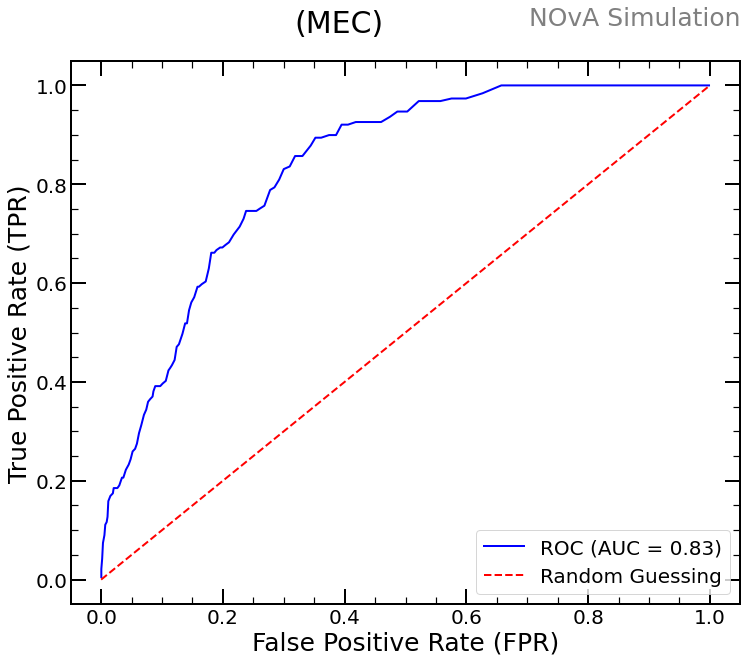

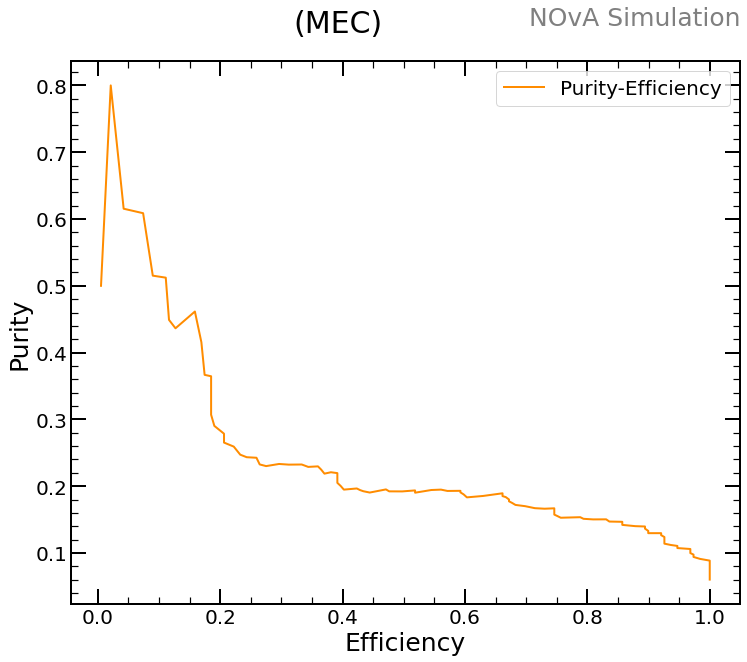

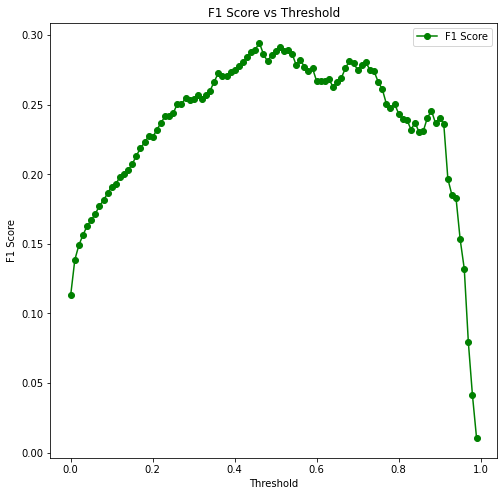

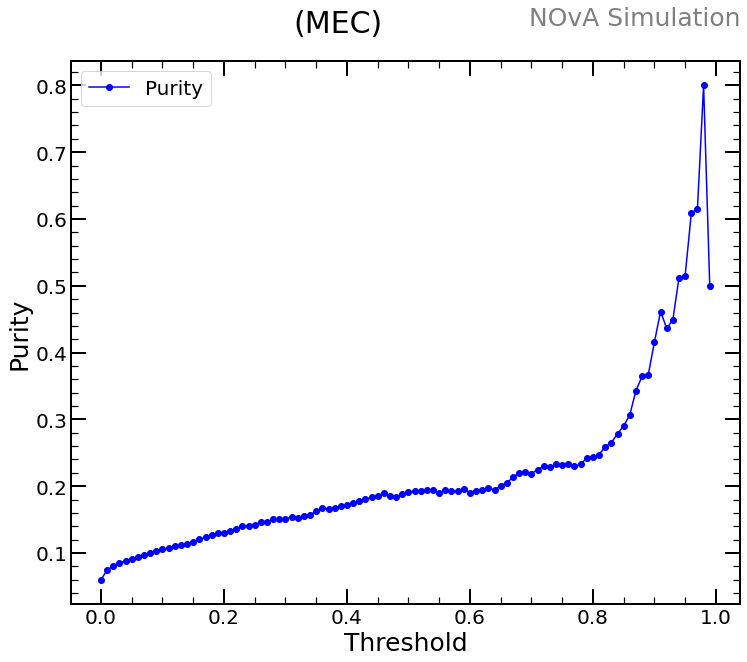

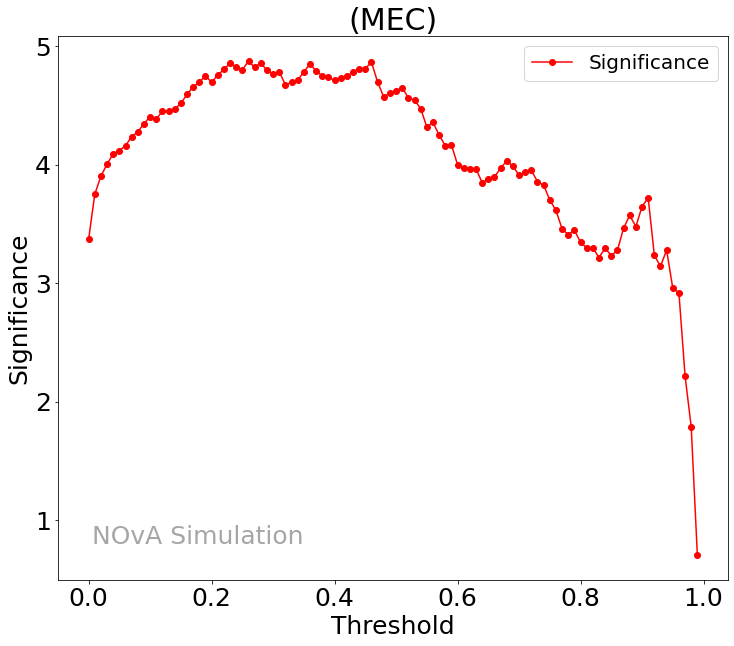

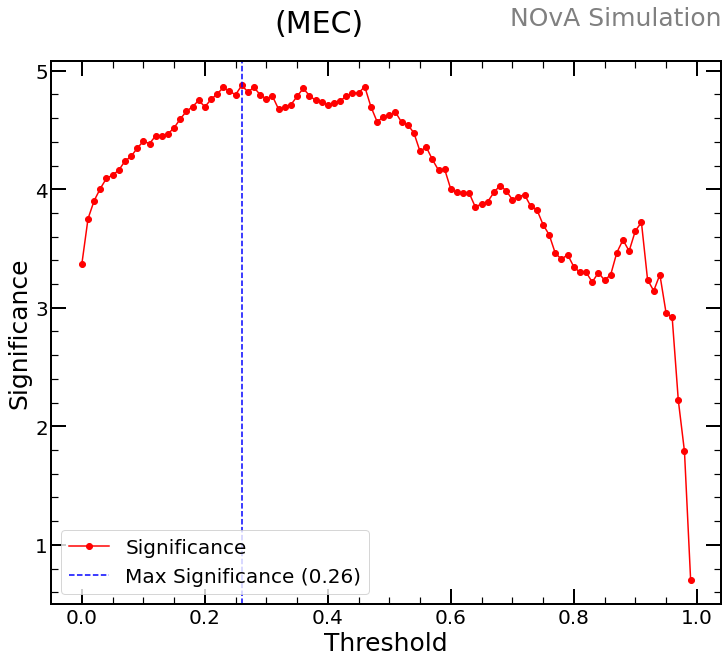

In [19]:
folder='MEC'
# Load data from the text file
data = np.loadtxt(f"{folder}/analysisfiles/analysis_data.txt", dtype=[('Threshold', float), ('Efficiency', float), ('Rejection', float), ('FPR', float), ('TPR', float), ('Precision', float), ('Recall', float), ('F1 Score', float), ('Purity', float), ('Significance', float)], delimiter='\t', skiprows=1)

# Extract data from loaded arrays
thresholds = data['Threshold']
efficiencies = data['Efficiency']
rejections = data['Rejection']
fprlist = data['FPR']
tprlist = data['TPR']
precisions = data['Precision']
recalls = data['Recall']
f1_scores = data['F1 Score']
purities = data['Purity']
significances = data['Significance']

# Plot the ROC curve
# Calculate AUC
roc_auc = auc(fprlist, tprlist)

# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fprlist, tprlist,  color='blue', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)',fontsize=25)
plt.ylabel('True Positive Rate (TPR)',fontsize=25)
plt.title(f'({folder})',x=0.4, y=1.042 ,fontsize=30)
plt.legend(loc='lower right',fontsize=20)
set_plot_style()
plt.savefig(f"{folder}/analysisfiles/images/frp_vs_trp_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/frp_vs_trp_{folder}.png', bbox_inches='tight')
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(12, 10))
plt.plot(recalls, precisions, color='darkorange', lw=2, label='Purity-Efficiency')
plt.xlabel('Efficiency',fontsize=25)
plt.ylabel('Purity',fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.042 ,fontsize=30)
plt.legend(loc='upper right',fontsize=20)
set_plot_style()
plt.savefig(f"{folder}/analysisfiles/images/precision_vs_recall_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/precision_vs_recall_{folder}.png', bbox_inches='tight')
plt.show()

# Plot the F1 score
plt.figure(figsize=(8, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='green', marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.savefig(f"{folder}/analysisfiles/images/f1_score.png")
plt.show()

# Plot purity and significance
plt.figure(figsize=(12, 10))
plt.plot(thresholds, purities, label='Purity', color='blue', marker='o')
plt.xlabel('Threshold',fontsize=25)
plt.ylabel('Purity',fontsize=25)
plt.title(f'({folder})',x=0.4,y=1.042 ,fontsize=30)
plt.legend(fontsize=20)
set_plot_style()
plt.savefig(f"{folder}/analysisfiles/images/purities_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/purities_{folder}.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 10))
plt.plot(thresholds, significances, label='Significance', color='red', marker='o')
plt.xlabel('Threshold',fontsize=25)
plt.ylabel('Significance',fontsize=25)
plt.title(f'({folder})',fontsize=30)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=25)
# Add NOvA Simulation text inside the plot square
plt.text(0.05, 0.1, 'NOvA Simulation', fontsize=25, color='gray', alpha=0.7, ha='left', va='top', transform=plt.gca().transAxes)

plt.show()

plt.figure(figsize=(12, 10))
plt.plot(thresholds, significances, label='Significance', color='red', marker='o')
plt.xlabel('Threshold',fontsize=25)
plt.ylabel('Significance',fontsize=25)
set_plot_style()
plt.title(f'({folder})',x=0.4,y=1.042 ,fontsize=30)
plt.savefig(f"{folder}/analysisfiles/images/frp_vs_trp_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/significances_{folder}.png', bbox_inches='tight')
plt.legend(fontsize=20)

# Find the index of the maximum significance value
max_index = np.argmax(significances)
max_threshold = thresholds[max_index]
max_significance = significances[max_index]

# Add a vertical line at the maximum significance threshold
plt.axvline(x=max_threshold, color='blue', linestyle='--', label=f'Max Significance ({max_threshold:.2f})')
plt.legend(loc='lower left', fontsize=20)
plt.savefig(f"{folder}/analysisfiles/images/frp_vs_trp_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/significances_with_max_{folder}.png', bbox_inches='tight')
plt.show()

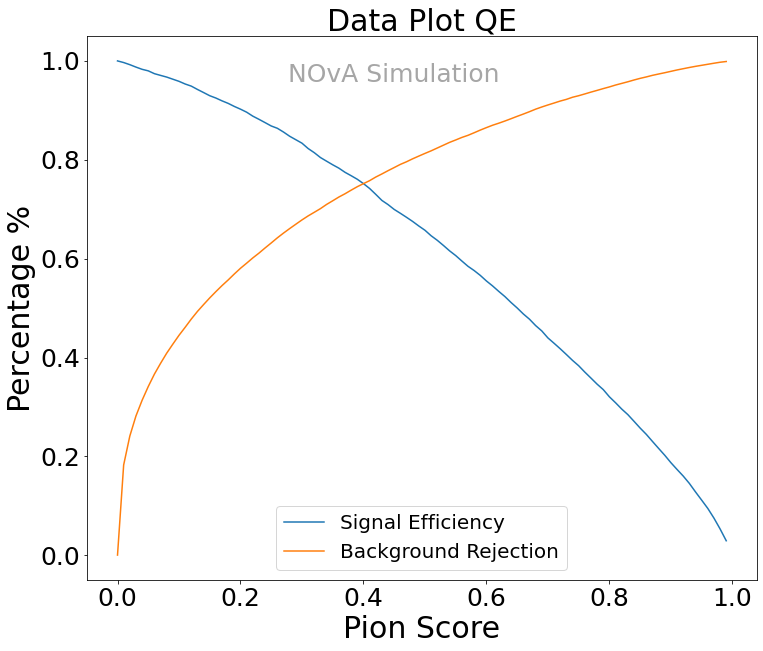

<Figure size 432x288 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from the text file
data = np.loadtxt(f"{folder}/analysisfiles/sig_rej_data.txt")  # Replace 'your_file.txt' with the actual filename

# Extract columns
x = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]

# Plot the data
plt.figure(figsize=(12, 10))
plt.plot(x, y1, label='Signal Efficiency')
plt.plot(x, y2, label='Background Rejection')

# Add labels and title
plt.xlabel('Pion Score',fontsize=30)
plt.ylabel('Percentage %', fontsize=30)
plt.title(f'Data Plot {folder}',fontsize=30)

plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=25)
# Add NOvA Simulation text inside the plot square
plt.text(0.3, 0.95, 'NOvA Simulation', fontsize=25, color='gray', alpha=0.7, ha='left', va='top', transform=plt.gca().transAxes)
#plt.savefig(f"{folder}/analysisfiles/images/purities_{folder}.png", bbox_inches='tight')
#plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/purities_{folder}.png', bbox_inches='tight')
plt.show()


plt.savefig(f"{folder}/analysisfiles/images/sig_rej.png")

# Show the plot
plt.show()

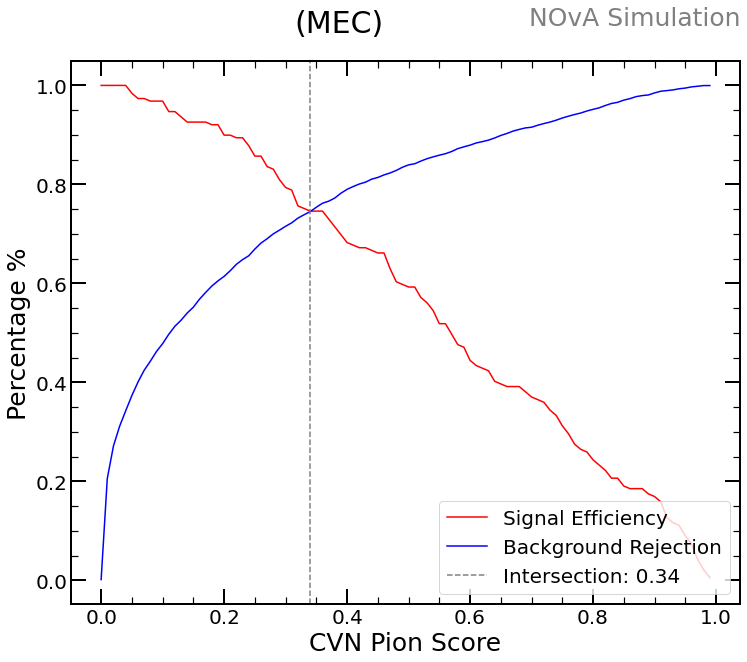

In [17]:
folder='MEC'
# Load data from the text file
data = np.loadtxt(f"{folder}/analysisfiles/sig_rej_data.txt")

# Extract columns
x = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]

# Plot the data
plt.figure(figsize=(12, 10))
plt.plot(x, y1, linewidth=1.5,color='red', label='Signal Efficiency')
plt.plot(x, y2, linewidth=1.5,color='blue', label='Background Rejection')

# Find intersection point
intersection_index = np.argmin(np.abs(y1 - y2))
intersection_x = x[intersection_index]

# Plot vertical line at intersection
plt.axvline(x=intersection_x, color='gray', linestyle='--', label=f'Intersection: {intersection_x:.2f}')

# Add labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Percentage %', fontsize=25)
plt.title(f'({folder})',x=0.4,  y=1.042, fontsize=30)

set_plot_style()

# Get existing legend labels
handles, labels = plt.gca().get_legend_handles_labels()

# Add intersection value to legend
intersection_label = f'Intersection: {intersection_x:.2f}'
labels.append(intersection_label)

# Plot legend with updated labels
plt.legend(handles, labels, fontsize=20, loc='lower right')  # Adjust legend location as needed

# Save the plot
plt.savefig(f"{folder}/analysisfiles/images/sig_rej_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/sig_rej_{folder}.png', bbox_inches='tight')

# Show the plot
plt.show()


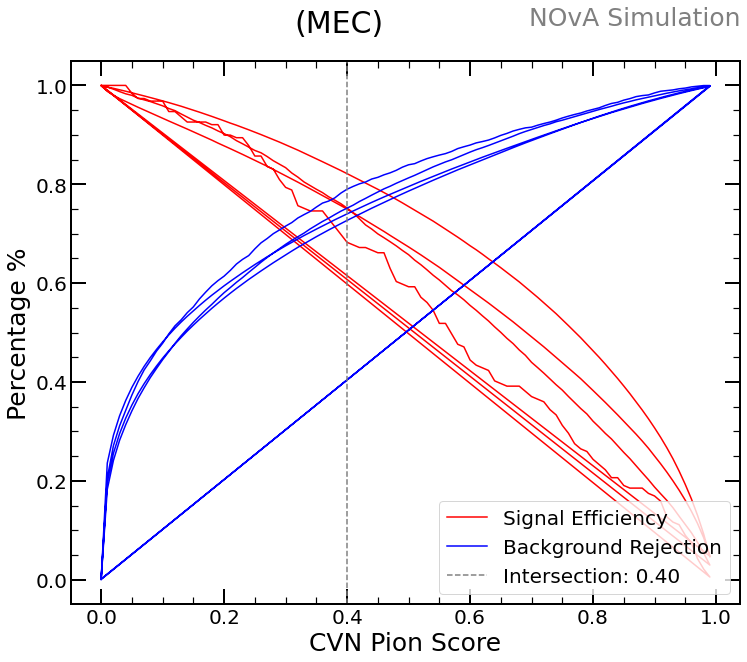

In [9]:
folder='MEC'
# Load data from the text file
data = np.loadtxt(f"sig_rej.txt")

# Extract columns
x = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]

# Plot the data
plt.figure(figsize=(12, 10))
plt.plot(x, y1, linewidth=1.5,color='red', label='Signal Efficiency')
plt.plot(x, y2, linewidth=1.5,color='blue', label='Background Rejection')

# Find intersection point
intersection_index = np.argmin(np.abs(y1 - y2))
intersection_x = x[intersection_index]

# Plot vertical line at intersection
plt.axvline(x=intersection_x, color='gray', linestyle='--', label=f'Intersection: {intersection_x:.2f}')

# Add labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Percentage %', fontsize=25)
plt.title(f'({folder})',x=0.4,  y=1.042, fontsize=30)

set_plot_style()

# Get existing legend labels
handles, labels = plt.gca().get_legend_handles_labels()

# Add intersection value to legend
intersection_label = f'Intersection: {intersection_x:.2f}'
labels.append(intersection_label)

# Plot legend with updated labels
plt.legend(handles, labels, fontsize=20, loc='lower right')  # Adjust legend location as needed

# Save the plot
# plt.savefig(f"{folder}/analysisfiles/images/sig_rej_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/sig_rej_{folder}.png', bbox_inches='tight')

# Show the plot
plt.show()

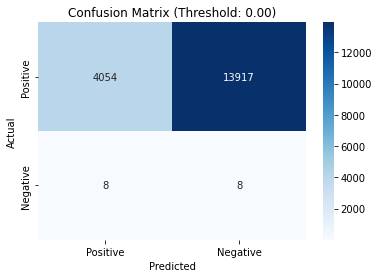

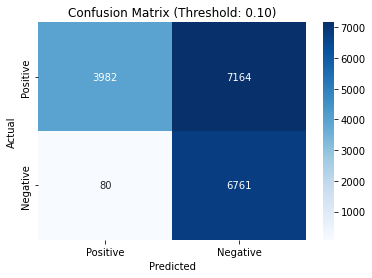

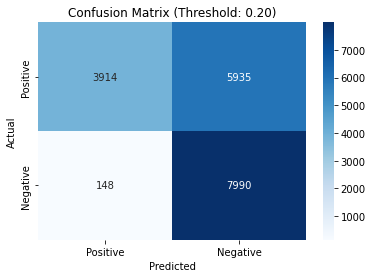

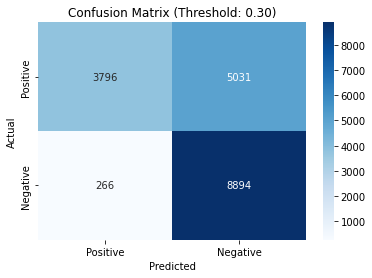

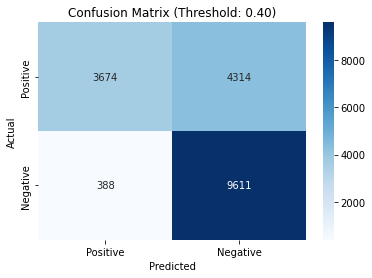

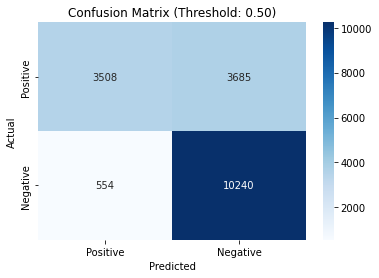

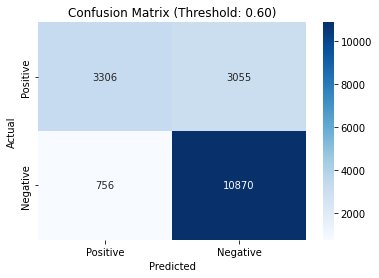

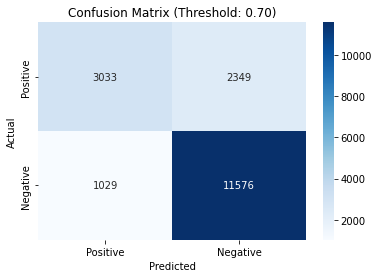

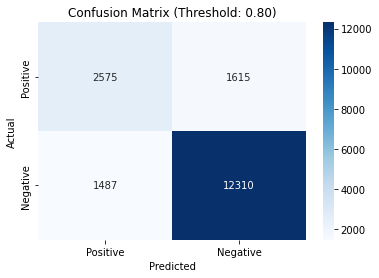

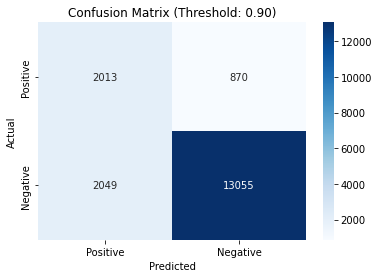

In [75]:
#Different confusion matrices

import seaborn as sns

group = 10 #range interval

for elements in range(group):
    threshold = elements/group
    conf_matrix = calculate_confusion_matrix(sig, bkg, threshold)
    plot_confusion_matrix(conf_matrix)

# Print or use the confusion matrix as needed
#print("Confusion Matrix:")
#for key, value in conf_matrix.items():
#    print(f"{key}: {value}")
    
# Plot the confusion matrix


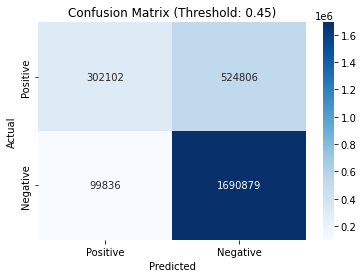

In [9]:
#Specific confusion matrix

import seaborn as sns

# Assuming you have a threshold value, calculate the confusion matrix
threshold = 0.45  # Adjust this based on your specific threshold

conf_matrix = calculate_confusion_matrix(sig, bkg, threshold)
plot_confusion_matrix(conf_matrix)

In [9]:
folder='NoCut'

In [10]:
#SAVES THE VALEUS OF THE PION SCORE FOR EACH OF THE PARTICLES AND PRINTS THE DISTRIBUTION OF THE SCORE IN EACH ONE

import numpy as np
import csv
import matplotlib.pyplot as plt
import decimal
import time
import decimal

start_time = time.time()


# Load the data from the text file
pdg = open(f"{folder}/pdgpngvars_total.txt", "r") 
cvn = open(f"{folder}/cvnvars_total.txt", "r")
ALLRowspdg = csv.reader(pdg, delimiter=' ')
ALLRowscvn = csv.reader(cvn , delimiter=' ')

pdgs = [row for row in ALLRowspdg]
cvns = [row for row in ALLRowscvn]

#print(bkg)

em = [] #11
ep = [] #-11
mm = [] # 13
mp = [] #-13
gmm = [] #22
pp = [] #211
pm = [] #-211
kp = [] #321
km = [] #-321
pr = [] #2212

code_lists = {
    11: em,
    -11: ep,
    13: mm,
    -13: mp,
    22: gmm,
    211: pp,
    -211: pm,
    321: kp,
    -321: km,
    2212: pr,
}

i1=0
i2=0
for event in pdgs:
        # Ignore the first and last entries
        event = event[1:-1]
        i2=1
        for element in event:
            if float(element) < 3000:
                if int(element) in code_lists:
                    code_lists[int(element)].append(cvns[i1][i2])
            i2=i2+1
        i1=i1+1
        
        
# Original lists
original_lists = [em, ep, pm, pp, mm, mp, gmm, kp, km, pr]

# List of round lists and corresponding titles
round_lists = []
titles = ['Electron', 'Positron', 'Negative pion', 'Positive pion', 'Negative muon', 'Positive muon', 'Gamma', 'Positive kaon', 'Negative kaon', 'Proton']

#for data in original_lists:
#    round_data = [custom_round(float(num)) for num in data]
#    round_lists.append(round_data)

for data in original_lists:
    round_data = [float(num) for num in data]
    round_lists.append(round_data)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 6.994001865386963 seconds


In [11]:
pmreal = []
for element in pm:
    pmreal.append(float(element))
    
ppreal = []
for element in pp:
    ppreal.append(float(element))

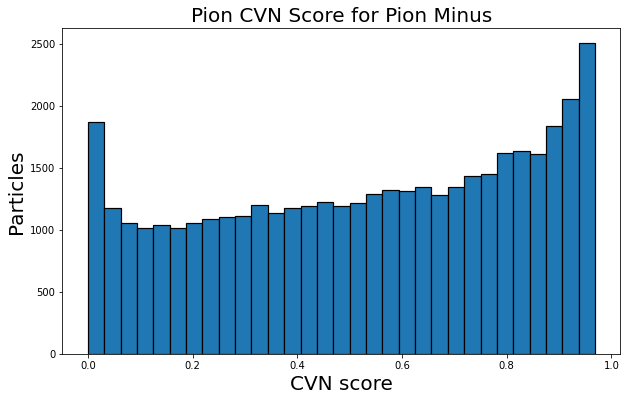

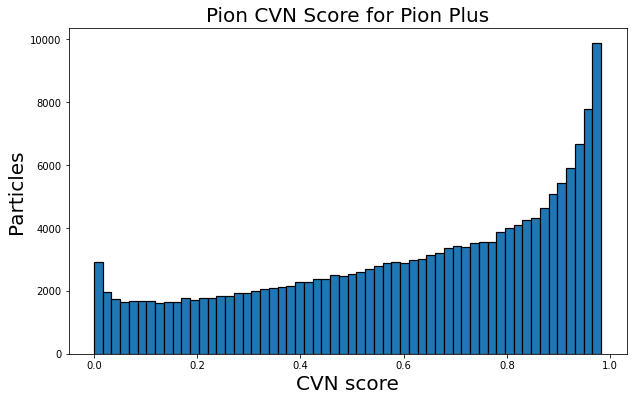

In [47]:
bin_size = 0.025
bin_edges = np.arange(0, 1, bin_size) 

plt.figure(figsize=(10, 6)) 
plt.hist(pmreal, bins=autobins(pmreal,0,1), edgecolor='black', linewidth=1.2)
plt.xlabel('CVN score', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Pion CVN Score for Pion Minus', fontsize=20)
#plt.yscale('log')
plt.savefig(f"{folder}/analysisfiles/images/cvn_pm.png")
plt.show()

bin_size = 0.025
bin_edges = np.arange(0, 1, bin_size) 

plt.figure(figsize=(10, 6)) 
plt.hist(ppreal, bins=autobins(ppreal,0,1), edgecolor='black', linewidth=1.2)
plt.xlabel('CVN score', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Pion CVN Score for Pion Plus', fontsize=20)
#plt.yscale('log')
plt.savefig(f"{folder}/analysisfiles/images/cvn_pp.png")
plt.show()

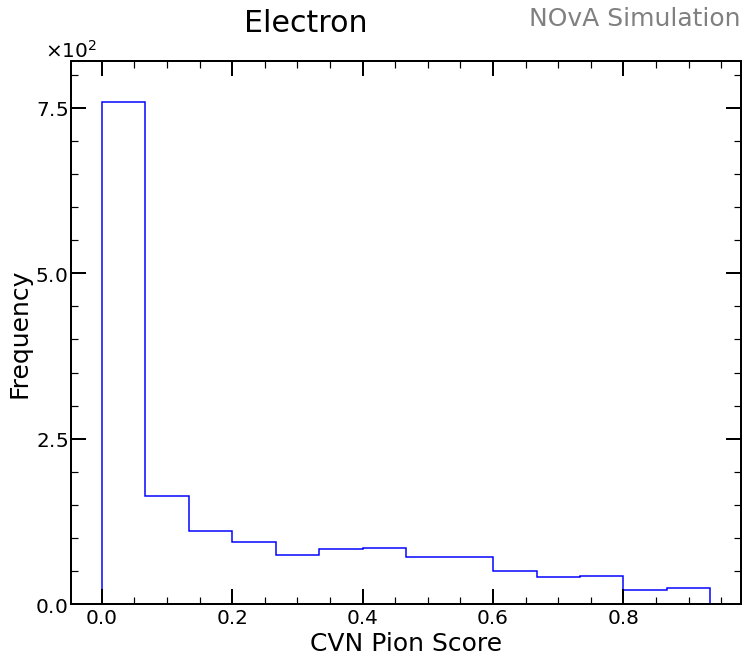

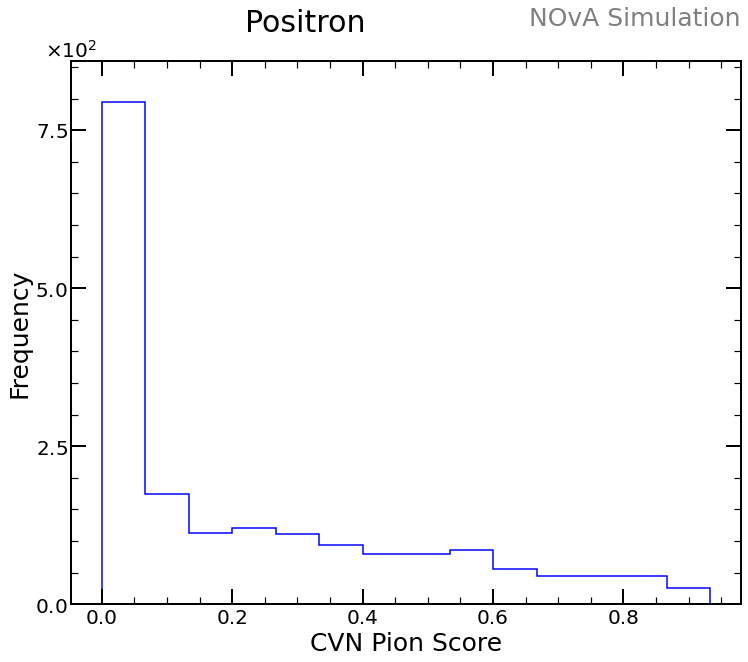

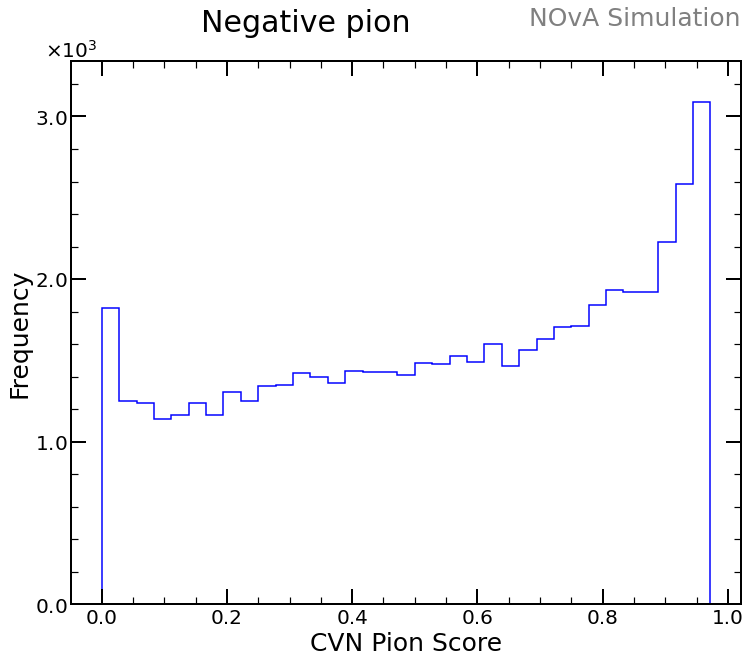

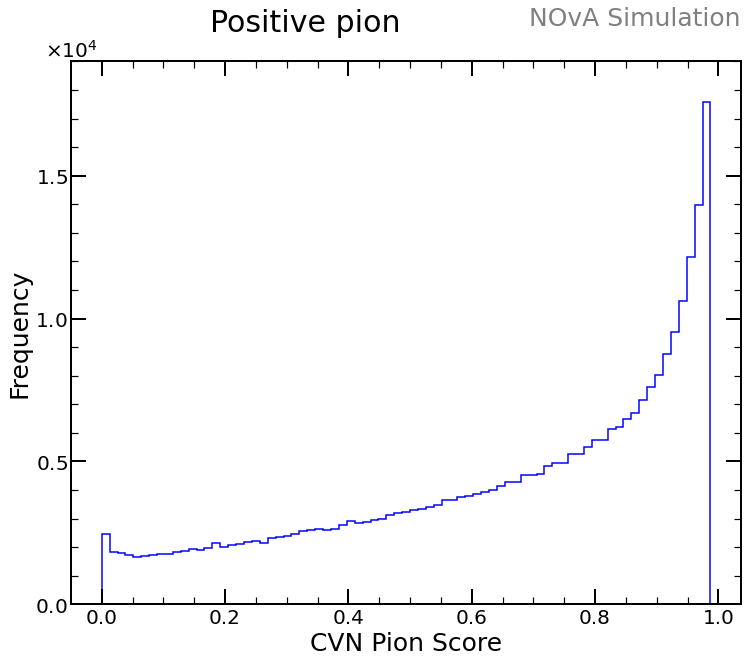

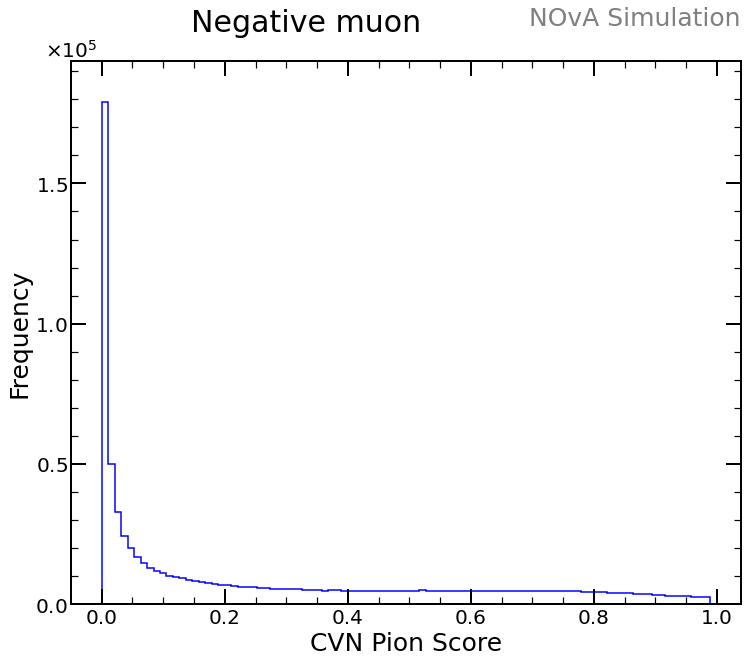

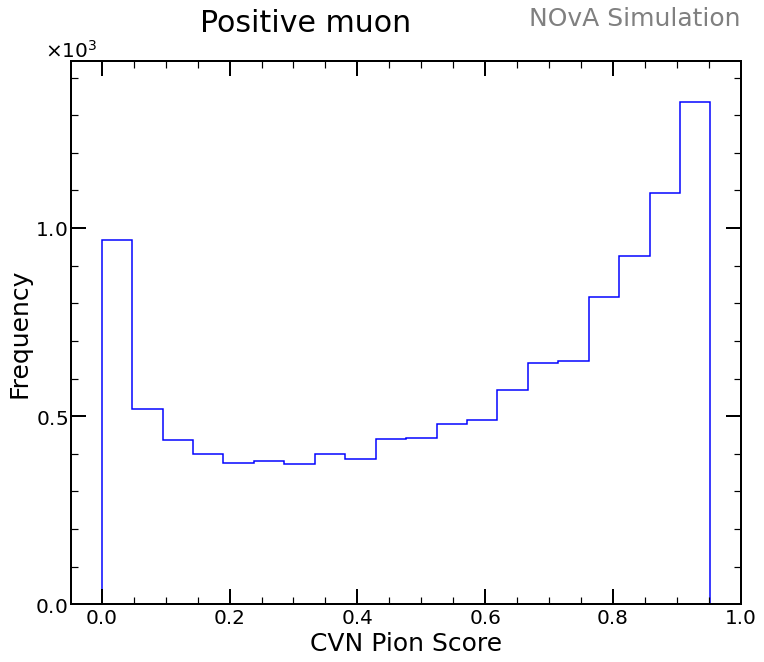

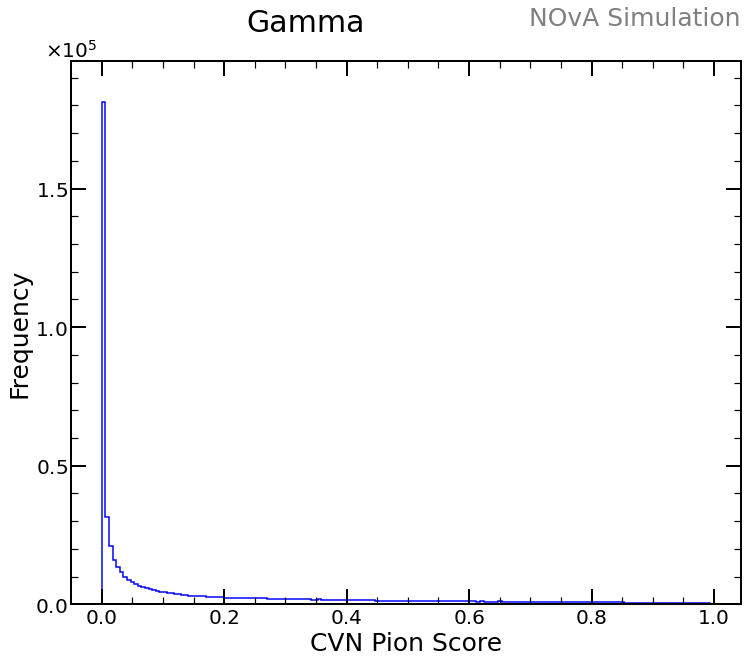

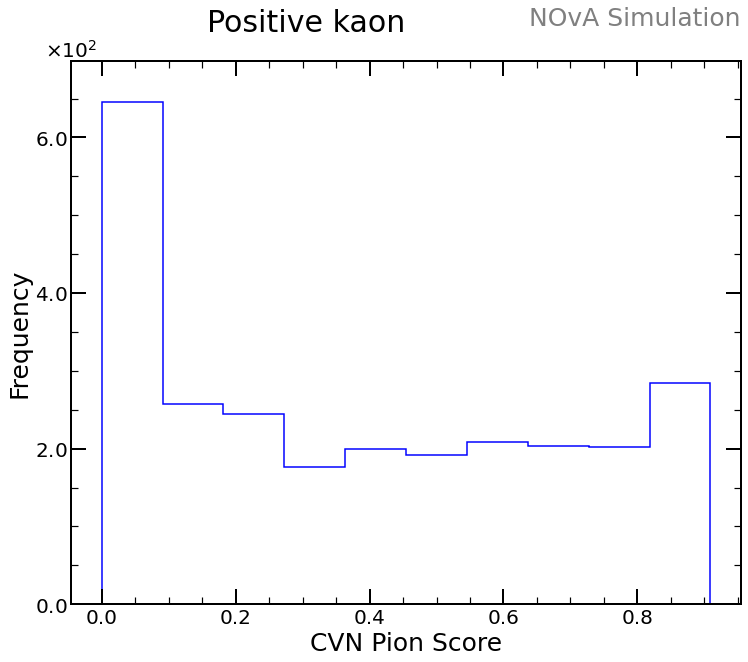

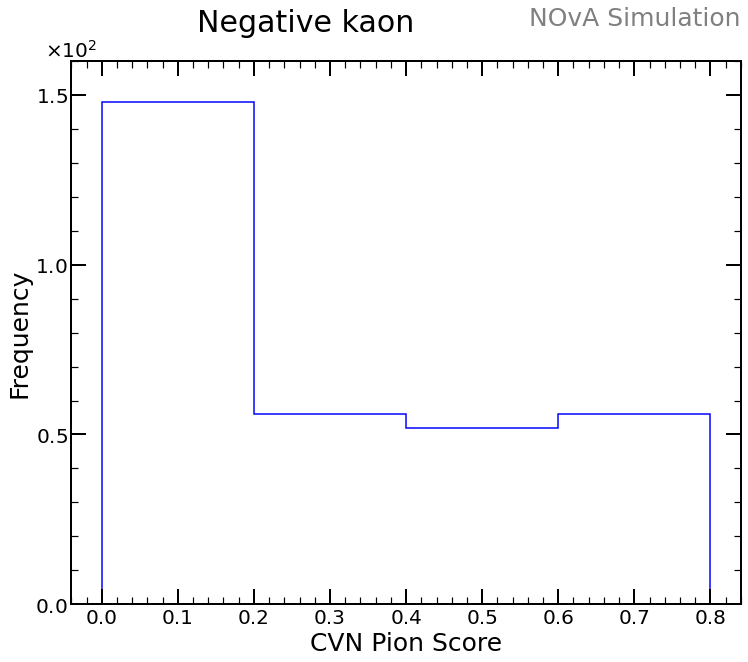

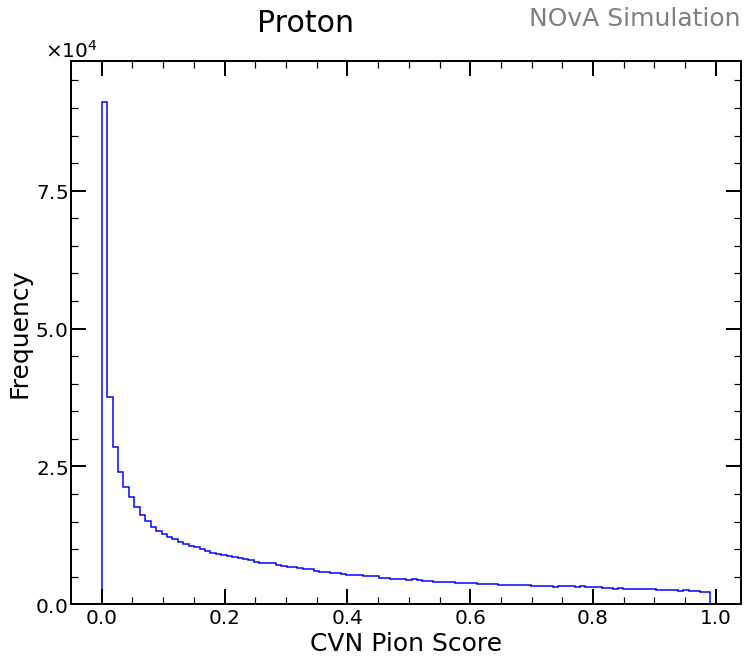

In [12]:
import matplotlib.pyplot as plt

# Define your lists and corresponding titles

# Iterate through the lists and titles
for data, title in zip(round_lists, titles):
    # Plot histogram
    plt.figure(figsize=(12, 10)) 
    plt.hist(data, bins=autobins(data,0,1), color='white', histtype='stepfilled', edgecolor='blue',linewidth=1.5)
    plt.xlabel('CVN Pion Score',fontsize=25)
    plt.ylabel('Frequency',fontsize=25)
    
    # Set title
    plt.title(f'{title}', x=0.35, y=1.044,fontsize=30)
    set_plot_style()
    set_sn2()
    plt.locator_params(axis='y', nbins=4)
    # Save the plot
    plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
    plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/histogram_cvn_for_{title}_{folder}.png', bbox_inches='tight')
    
    # Display the plot
    plt.show()

In [92]:

# Load the data from the text file
pdgs = read_file(f"{folder}", "pdgpngvars_total") 
pdg_of_all_part = []

for event in pdgs:
        # Ignore the first and last entries
        event = event[1:-1]
        l=len(event)
        for i in range(l):
            if event[i] not in pdg_of_all_part:
                pdg_of_all_part.append(event[i])
                
print(pdg_of_all_part)


['2212', '13', '22', '-211', '1.00001e+09', '211', '-13', '1.00002e+09', '-11', '11', '1.00005e+09', '321', '-321', '1.00004e+09', '1.00003e+09', '1.00006e+09', '3112']
